In [52]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import json

In [53]:
json_data = json.load(open('../../datasets/usda_food/database.json', 'r'))

In [54]:
json_data[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [55]:
nutr = pd.DataFrame(json_data, columns=['description', 'group', 'id', 'manufacturer'])
nutr.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [56]:
nutr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [57]:
nutr.nunique()

description     6636
group             25
id              6636
manufacturer      67
dtype: int64

In [58]:
nutrients = []
for rec in json_data:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [59]:
nutrients.duplicated().sum()

14179

In [60]:
nutrients = nutrients.drop_duplicates()

In [61]:
nutrients.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [62]:
info = nutrients.rename(columns={'description':'food', 'group':'fgroup'},copy=False).drop(columns=['value','units'])
info.head()

,food,fgroup,id
0,Protein,Composition,1008
1,Total lipid (fat),Composition,1008
2,"Carbohydrate, by difference",Composition,1008
3,Ash,Other,1008
4,Energy,Energy,1008


In [63]:
nutrients = nutrients.rename(columns={'description' : 'nutrient','group' : 'nutgroup'} , copy=False)
nutrients.head()

,value,units,nutrient,nutgroup,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [64]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup
0,25.18,g,Protein,Composition,1008,Protein,Composition
1,25.18,g,Protein,Composition,1008,Total lipid (fat),Composition
2,25.18,g,Protein,Composition,1008,"Carbohydrate, by difference",Composition
3,25.18,g,Protein,Composition,1008,Ash,Other
4,25.18,g,Protein,Composition,1008,Energy,Energy


<AxesSubplot:ylabel='fgroup'>

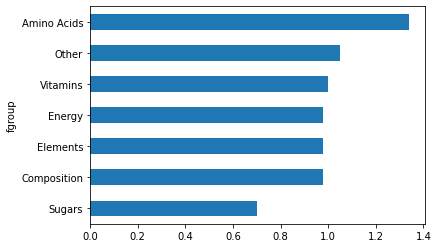

In [67]:
res = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
res['Zinc, Zn'].sort_values().plot(kind='barh')